In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Generate synthetic monthly demand data
np.random.seed(42)
months = pd.date_range(start='2022-01-01', periods=24, freq='M')
demand = 500 + np.sin(np.linspace(0, 3 * np.pi, 24)) * 100 + np.random.normal(0, 20, 24)


/tmp/ipython-input-2-2234410333.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2022-01-01', periods=24, freq='M')


In [3]:
# Create DataFrame
df = pd.DataFrame({'Month': months, 'Demand': demand})
df.set_index('Month', inplace=True)


In [4]:
# Create lag features (previous 3 months)
for i in range(1, 4):
    df[f'Lag_{i}'] = df['Demand'].shift(i)


In [5]:
# Drop NaNs due to lagging
df.dropna(inplace=True)


In [6]:
# Features and target
X = df[['Lag_1', 'Lag_2', 'Lag_3']]
y = df['Demand']


In [7]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.25)


In [8]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1413.62
R² Score: 0.32


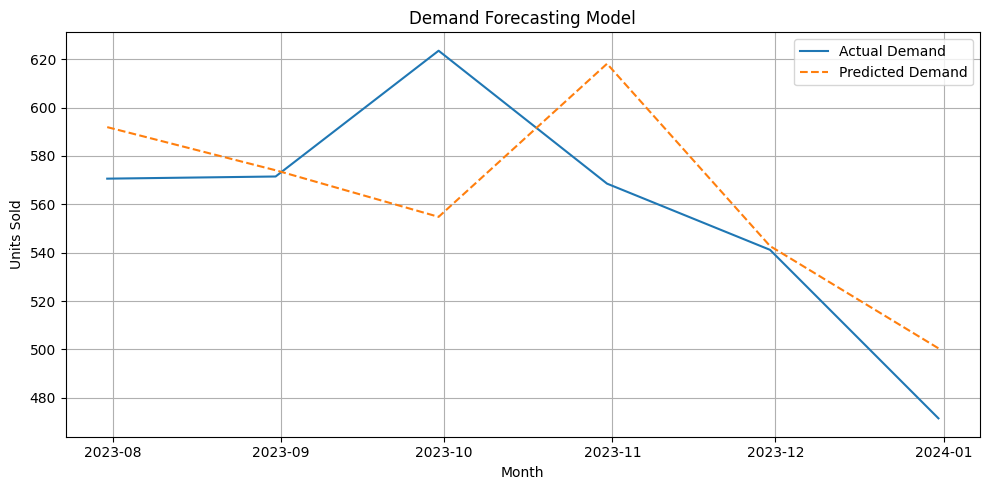

In [11]:
# Plot actual vs predicted demand
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test.values, label='Actual Demand')
plt.plot(y_test.index, y_pred, label='Predicted Demand', linestyle='--')
plt.title("Demand Forecasting Model")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()